In [48]:
from pyESN.pyESN import ESN
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from utils import *
eeg = read_edf_by_fileindex(0).get_data(picks='EEG')[0]


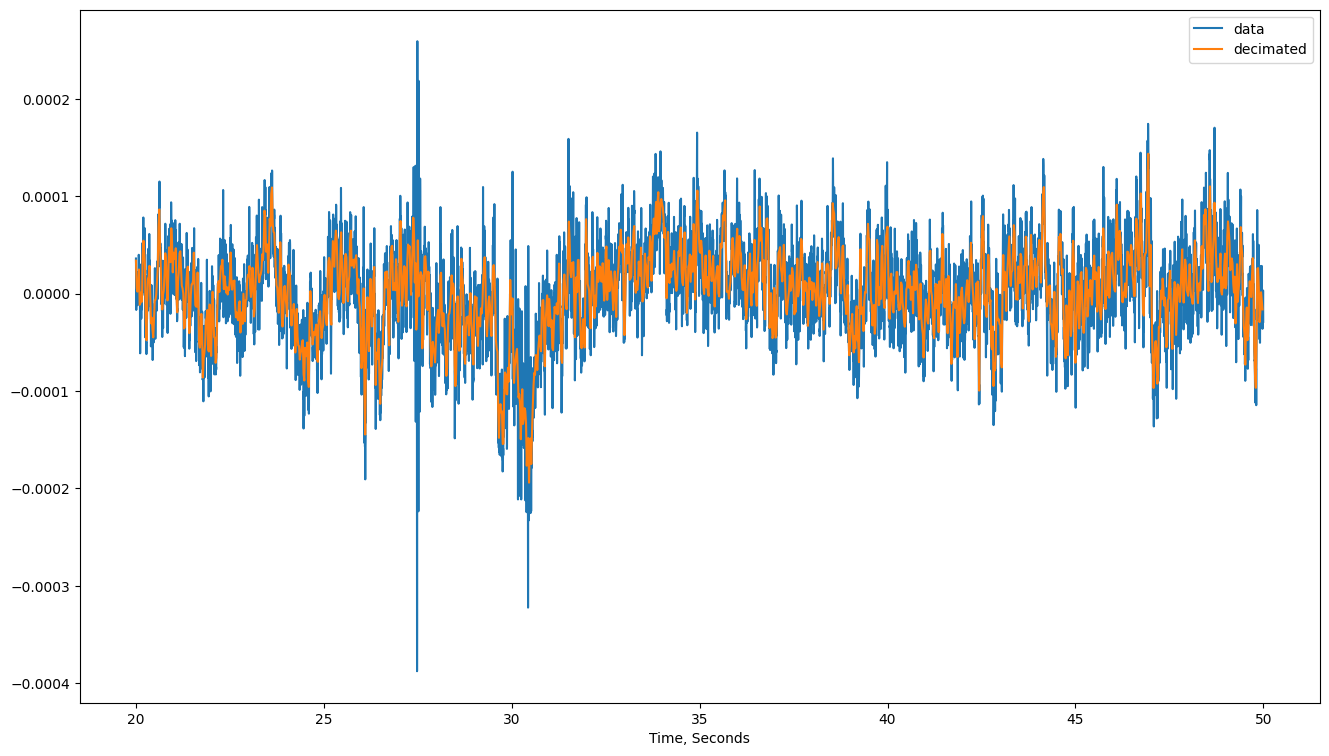

In [49]:
from scipy import signal
import matplotlib.pyplot as plt
start_seconds = 20
end_seconds = 50
wave_duration_seconds = end_seconds - start_seconds
fs = 500
decimation_factor = 10
samples = wave_duration_seconds*fs
samples_decimated = int(samples/decimation_factor)

x = np.linspace(start_seconds, end_seconds, samples, endpoint=False)
y = eeg[start_seconds*fs:end_seconds*fs]

ydem = signal.decimate(y, decimation_factor)
xnew = np.linspace(start_seconds, end_seconds, samples_decimated, endpoint=False)

plt.figure(figsize=(16,9),dpi=100)
plt.plot(x, y, '-', xnew, ydem, '-')
plt.xlabel('Time, Seconds')
plt.legend(['data', 'decimated'], loc='best')
plt.savefig('out.pdf')

Text(0, 0.5, 'PSD [V**2]')

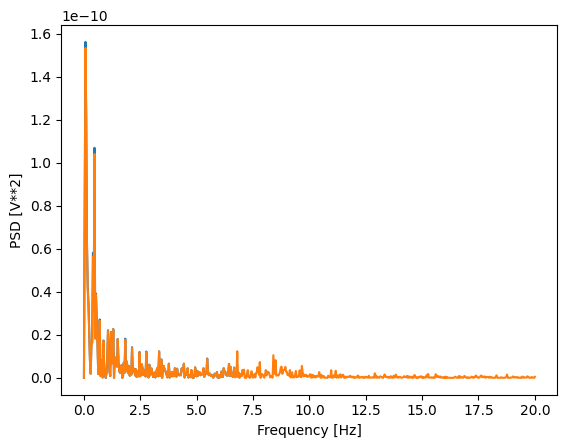

In [50]:
from scipy.signal import periodogram

f, Pxx = periodogram(y, 500,scaling='spectrum')
plt.plot(f[:201], Pxx[:201],label='computed averages')
f, Pxx = periodogram(ydem, 50,scaling='spectrum')
plt.plot(f[:601], Pxx[:601],label='computed averages')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2]')

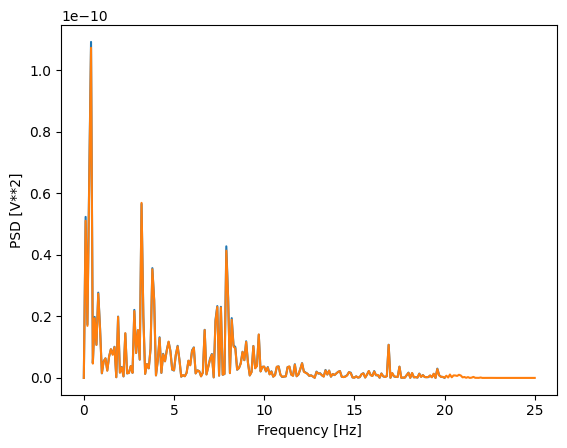

In [53]:
def plotRawVersusDecimatedPSDForEpoch(epoch_idx):
    start_seconds = epoch_idx * 10
    end_seconds = (epoch_idx * 10) + 10
    wave_duration_seconds = end_seconds - start_seconds
    fs = 500
    decimation_factor = 10
    samples = wave_duration_seconds*fs
    samples_decimated = int(samples/decimation_factor)

    x = np.linspace(start_seconds, end_seconds, samples, endpoint=False)
    y = eeg[start_seconds*fs:end_seconds*fs]

    ydem = signal.decimate(y, decimation_factor)
    xnew = np.linspace(start_seconds, end_seconds, samples_decimated, endpoint=False)

    f, Pxx = periodogram(y, 500,scaling='spectrum')
    plt.plot(f[:201], Pxx[:201],label='computed averages')
    f, Pxx = periodogram(ydem, 50,scaling='spectrum')
    plt.plot(f[:601], Pxx[:601],label='computed averages')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('PSD [V**2]')
plotRawVersusDecimatedPSDForEpoch(101)